<a href="https://colab.research.google.com/github/AzucenaMV/CapstoneProject/blob/master/AirlineData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/Accidents.csv'
accidents = pd.read_csv(url, sep=",")

In [57]:
accidents.head(5)

,Date,StateOfOccurrence,Location,Model,Registration,Operator,StateOfOperator,StateOfRegistry,FlightPhase,Class,Fatalities,Over2250,Over5700,ScheduledCommercial,InjuryLevel,TypeDesignator,Helicopter,Airplane,Engines,EngineType,Official,OccCats,Risk,Year
0,"""2008-01-02T00:00:00.000Z""",PHL,Masbate Airport (MBT),NAMC YS11 A,RP-C3592,Philippines Asian Spirit,PHL,PHL,Landing,Accident,0.0,True,True,True,None,YS11,NaN,True,2,Turboprop,True,"[""RE""]",RS,2008
1,"""2008-01-02T00:00:00.000Z""",IRN,Tehran-Mehrabad Airport (THR),FOKKER F27 100,EP-IDB,"Iran, Islamic Republic Of Iran National Airlin...",IRN,IRN,Take-off,Accident,0.0,True,True,True,None,F27,NaN,True,2,Turboprop,True,"[""ICE"",""F-POST""]",OTH,2008
2,"""2008-01-03T00:00:00.000Z""",USA,Oklahoma City,PILATUS PC12,N398J,NaN,NaN,USA,Standing,Accident,1.0,True,False,NaN,Fatal,PC12,False,True,1,Turboprop,NaN,"[""RAMP""]",OTH,2008
3,"""2008-01-04T00:00:00.000Z""",CHL,NaN,Russian Helicopters (Kamov) Ka-32,EC-JGX,Babcock MCS Espana,NaN,ESP,Standing,Accident,0.0,True,True,False,None,KA50,True,False,2,Turboprop,NaN,[],NaN,2008
4,"""2008-01-04T00:00:00.000Z""",VEN,A 20 NM del VOR del Gran Roque,LET L410 UVP,YV2081,Venezuela,VEN,VEN,En route,Accident,14.0,True,True,True,Fatal,L410,NaN,True,2,Turboprop,True,"[""SCF-PP""]",SCF,2008


In [0]:
air_accidents = accidents[accidents['Airplane']]

In [0]:
accidents[['date','rate']].set_index('date').plot()
plt.title('Unemployment Rate')

In [0]:
url = "https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/loadfactor.csv"
lf = pd.read_csv(url)

In [0]:
lf = lf[~lf["Month"].str.contains("TOTAL")]

In [0]:
lf.head(10)

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,67.88,72.85,70.01
1,2002,11,66.62,69.86,68.00
2,2002,12,72.88,73.42,73.11
4,2003,1,64.40,72.50,67.90
5,2003,2,68.10,68.89,68.43
6,2003,3,72.43,69.36,71.14
7,2003,4,72.13,66.78,69.97
8,2003,5,73.98,72.42,73.35
9,2003,6,78.58,80.01,79.18
10,2003,7,80.98,81.56,81.23


In [0]:
url = "https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/US_Jet_Fuel_Spot_Price.csv"
fuel_spot= pd.read_csv(url,skiprows=4)
fuel_spot.columns = ['date','dpg']
fuel_spot['date'] = pd.to_datetime(fuel_spot['date'], format='%m/%d/%Y')


In [111]:
fuel_spot.head(5)

,date,dpg
0,2019-10-07,1.856
1,2019-10-04,1.847
2,2019-10-03,1.827
3,2019-10-02,1.818
4,2019-10-01,1.850


Text(0.5, 1.0, 'Jet Fuel Spot Price')

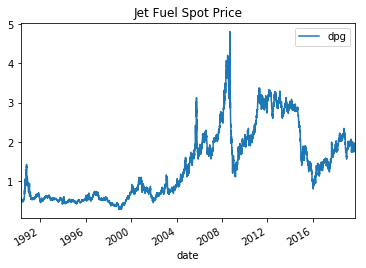

In [5]:
fuel_spot[['date','dpg']].set_index('date').plot()
plt.title('Jet Fuel Spot Price')

In [0]:
fuel_spot['qy'] =  fuel_spot['date'].dt.year.apply(str) + "Q" + fuel_spot['date'].dt.quarter.apply(str) 

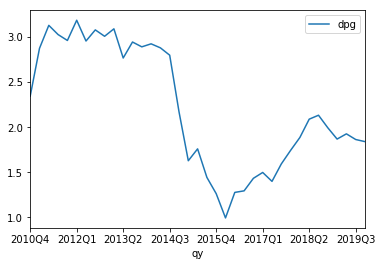

In [12]:
fuel_spot[fuel_spot.date >= "2010-10-04"].groupby(['qy']).mean().plot()

In [0]:
url = "https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/UnemploymentRate.csv"
unemployment = pd.read_csv(url)

In [0]:
unemployment.rename(columns = dict(zip(unemployment.columns, ['date', 'rate'])), inplace=True)
unemployment['date'] = pd.to_datetime(unemployment['date'], format='%Y-%m-%d')

In [0]:
unemployment.head()

,date,rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


Text(0.5, 1.0, 'Unemployment Rate')

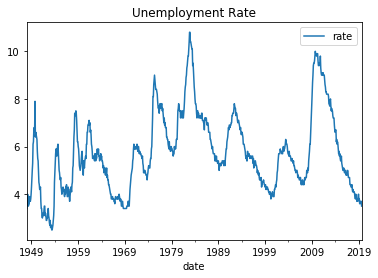

In [0]:
unemployment[['date','rate']].set_index('date').plot()
plt.title('Unemployment Rate')

In [0]:
url = "https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/airlineGT.csv"
trend = pd.read_csv(url, skiprows = 2)

In [0]:
trend.head(5)

,Mes,airline: (Estados Unidos)
0,2004-01,86
1,2004-02,85
2,2004-03,86
3,2004-04,85
4,2004-05,92


In [0]:
url = "https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/GDP_QPCSA.csv"
gdp = pd.read_csv(url)

In [0]:
gdp.rename(columns = dict(zip(gdp.columns, ['date', 'value'])), inplace=True)
gdp['date'] = pd.to_datetime(gdp['date'], format='%Y-%m-%d')


In [0]:
gdp.head()

,date,value
0,1947-04-01,4.9
1,1947-07-01,6.0
2,1947-10-01,17.4
3,1948-01-01,9.8
4,1948-04-01,10.8


Text(0.5, 1.0, 'GPD')

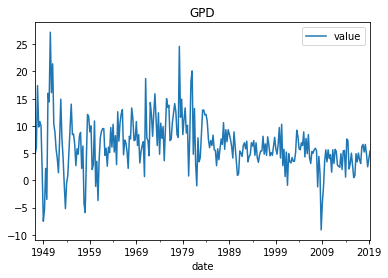

In [0]:
gdp[['date','value']].set_index('date').plot()
plt.title('GPD')

In [0]:
url = "https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/CPI_SA.csv"
cpi = pd.read_csv(url)
cpi.columns = ["date","cpi"]

In [27]:
cpi.head(5)

,date,cpi
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


In [0]:
diff = cpi['cpi'].diff(periods=1)[1:] 

In [0]:
cpi['inflation'] = diff.values / cpi['cpi'][:-1]

Text(0.5, 1.0, 'Inflation')

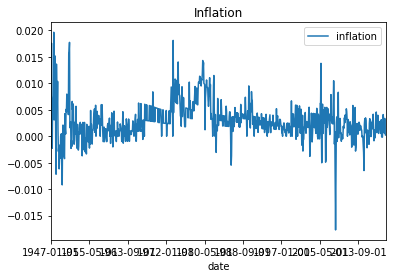

In [54]:
cpi[['date','inflation']].set_index('date').plot()
plt.title('Inflation')

## Delta Airline

### Fundamentals

In [0]:
url = 'https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/Delta/DAL-fundamentals.csv'
dal_fdmt = pd.read_csv(url)

In [0]:
dal_fdmt['datadate'] = pd.to_datetime(dal_fdmt['datadate'], format='%Y%m%d')

In [19]:
dal_fdmt.loc[:,['datadate', 'tic', 
       'dvpq', 'epsf12', 'epsfxq', 'ibq', 'revtq', 
       'mkvaltq', 'prccq']].head()

,datadate,tic,dvpq,epsf12,epsfxq,ibq,revtq,mkvaltq,prccq
0,2009-06-30,DAL,0.0,-3.51,-0.31,-257.0,7000.0,4502.5646,5.79
1,2009-09-30,DAL,0.0,-3.58,-0.19,-161.0,7574.0,6984.5171,8.96
2,2009-12-31,DAL,0.0,-1.50,-0.03,-25.0,6805.0,8921.4079,11.38
3,2010-03-31,DAL,0.0,-0.84,-0.31,-256.0,6848.0,11488.0055,14.59
4,2010-06-30,DAL,0.0,0.03,0.55,467.0,8168.0,9268.9758,11.75


Text(0.5, 1.0, 'Earnings per share quarterly')

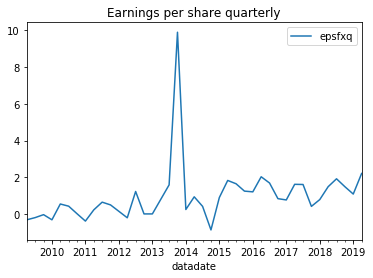

In [22]:
dal_fdmt[['datadate','epsfxq']].set_index('datadate').plot()
plt.title('Earnings per share quarterly')

### Stock Price

In [0]:
url = 'https://raw.githubusercontent.com/AzucenaMV/CapstoneProject/master/data/Delta/DAL-stock.csv'
dal_stock = pd.read_csv(url)

In [15]:
dal_stock.head(5)

,gvkey,iid,datadate,tic,conm,cshoc,cshtrd,eps,epsmo,prccd,exchg,spcindcd,spcseccd
0,3851,3,2010-01-04,DAL,DELTA AIR LINES INC,779522000.0,14482470.0,-1.64,9,11.22,11,605,600
1,3851,3,2010-01-05,DAL,DELTA AIR LINES INC,779522000.0,25065900.0,-1.64,9,12.10,11,605,600
2,3851,3,2010-01-06,DAL,DELTA AIR LINES INC,779522000.0,14980680.0,-1.64,9,12.11,11,605,600
3,3851,3,2010-01-07,DAL,DELTA AIR LINES INC,779522000.0,19812230.0,-1.64,9,12.69,11,605,600
4,3851,3,2010-01-08,DAL,DELTA AIR LINES INC,779522000.0,24589160.0,-1.64,9,12.47,11,605,600


In [0]:
dal_stock['datadate'] = pd.to_datetime(dal_stock['datadate'], format='%Y%m%d')

Text(0.5, 1.0, 'Delta Stock Price')

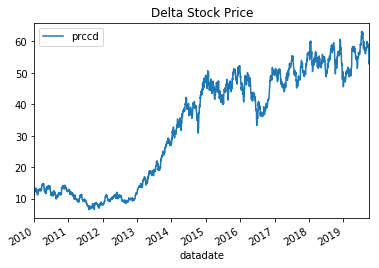

In [14]:
dal_stock[['datadate','prccd']].set_index('datadate').plot()
plt.title('Delta Stock Price')